In [1]:
# Install packages (run this only in CMD or terminal, NOT inside Python)
# pip install numpy pandas matplotlib seaborn scikit-learn

import sys
import numpy as np
import pandas as pd
import matplotlib
import sklearn

print("=== Library Versions ===")
print(f"Python     : {sys.version.split()[0]}")
print(f"Numpy      : {np.__version__}")
print(f"Pandas     : {pd.__version__}")
print(f"Matplotlib : {matplotlib.__version__}")
print(f"Sklearn    : {sklearn.__version__}")



=== Library Versions ===
Python     : 3.13.5
Numpy      : 2.1.3
Pandas     : 2.2.3
Matplotlib : 3.10.0
Sklearn    : 1.6.1


In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = [[1], [2], [3], [4]]
y = [2, 4, 6, 8]
model.fit(X, y)
prediction = model.predict([[10]])
print("Prediction for input 5 is:", prediction)


Prediction for input 5 is: [20.]


# 3.17 Lets Visualize Our Data

In [4]:
from sklearn.linear_model import LinearRegression
# Create model
model = LinearRegression()
# Training data
x = [[1], [2], [3], [4]]
y = [2, 4, 6, 8]
# Train the model
model.fit(x, y)
# Take user input
user_value = float(input("Enter a number to predict: "))
# Predict
prediction = model.predict([[user_value]])
print("Prediction is:", prediction[0])


Enter a number to predict:  2


Prediction is: 4.0


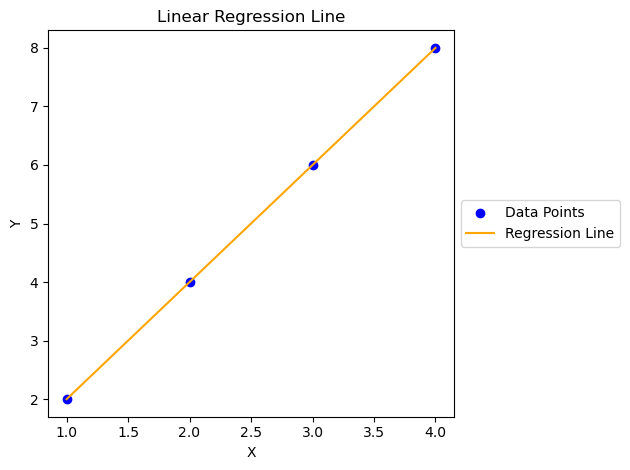

In [12]:
import matplotlib.pyplot as plt
#Scatter plot
plt.scatter(X,y, color = 'blue', label = 'Data Points')
#Gegression line ka plot
plt.plot(X, model.predict(X), color = 'orange', label ='Regression Line')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.title("Linear Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

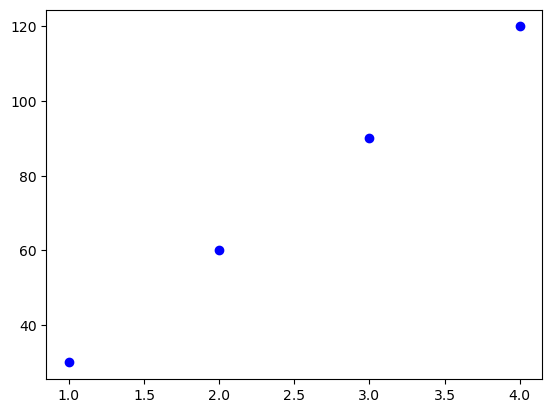

In [26]:
import matplotlib.pyplot as plt
weights = np.array([1,2,3,4]).reshape(-1, 1)
prices = np.array([30, 60, 90, 120])
plt.scatter(weights, prices, color = 'blue', label = 'Data points')


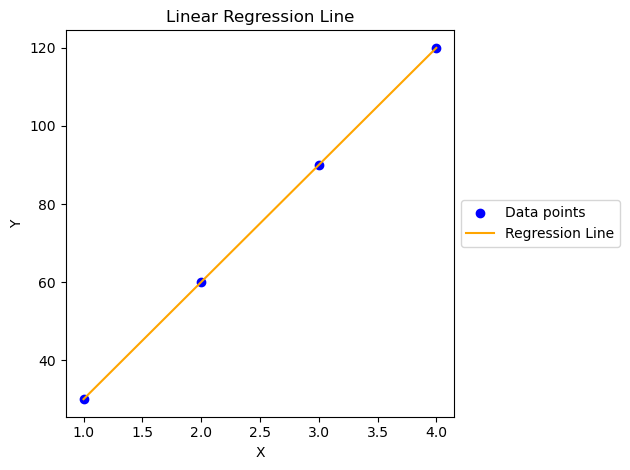

In [22]:
import matplotlib.pyplot as plt
weights = np.array([1,2,3,4]).reshape(-1, 1)
prices = np.array([30, 60, 90, 120])
plt.scatter(weights, prices, color = 'blue', label = 'Data points')
plt.plot(weights, model.predict(weights), color = 'orange', label ='Regression Line')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.title("Linear Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()


# 32.3 Load a dataset using pandas

In [33]:
import pandas as pd
data = pd.read_csv("student_scores.csv")
data.head(10)

,name,hours,score,gender,grades,class
0,Aarav,8,76,M,A,9A
1,Riya,5,62,F,B,9B
2,Kabir,10,88,M,A,10A
3,Sana,4,55,F,C,9A
4,Vivaan,7,72,M,B,10B
5,Ishita,6,64,F,B,9C
6,Rohan,3,48,M,D,9B
7,Meera,9,90,F,A,11A
8,Aditya,2,38,M,F,9C
9,Kavya,11,93,F,A,12A


# 32.4Handling Missing Values

In [34]:
print(data.isnull().sum())
data["score"] = data["score"].fillna(data["score"].mean())
data = data.dropna()

name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64


In [35]:
data.shape

(92, 6)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB


In [39]:
data.isnull().sum() #completness ke liye to check if any col has missing/null values

name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

In [43]:
#Dataset consistency check
data.dtypes   #check data consistency
#data['CustomerType'].value_counts()  # spot inconsistent labels

name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object

<Axes: >

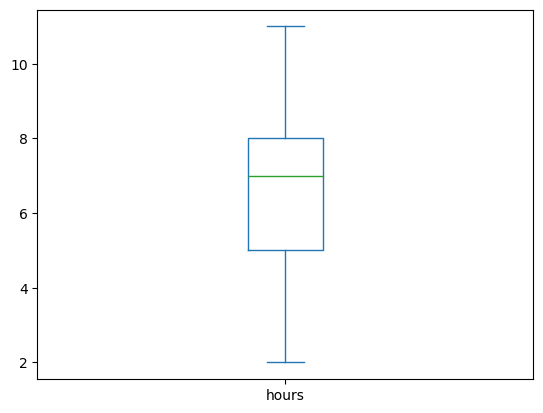

In [45]:
#Accuracy (values realistic or outlier)
data.describe()  #Summary stats
data['hours'].plot(kind='box')

In [49]:
#Time -keeping - to check if data is up to date
data['hours'].max()
#data['hours'].min()


11

In [51]:
#Bias Check - is data skewed toward 1 user group
data['grades'].value_counts(normalize=True)

grades
B    0.358696
A    0.326087
C    0.195652
D    0.086957
F    0.032609
Name: proportion, dtype: float64

# Dataset Specification sheet

| **Field**           | **Details**                                                                                                                                    |
| ------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **Dataset Name**    | *sample_recharge_data.csv* (demo dataset)                                                                                                      |
| **Description**     | Contains small customer recharge + usage data for demonstrating Data Quality checks (Completeness, Consistency, Accuracy, Time-Keeping, Bias). |
| **Features**        | `MonthlyUsage`, `CustomerType`, `Complaints`, `Recharged`, `RechargeDate`                                                                      |
| **Target Variable** | None (Exploratory dataset only)                                                                                                                |
| **Number of Rows**  | 5                                                                                                                                              |
| **Null Handling**   | 1 missing value in `MonthlyUsage` (left intentionally for demo)                                                                                |
| **Transformations** | Converted `RechargeDate` to datetime; performed value counts, dtype checks, and boxplot analysis for data quality                              |
| **Owner**           | Student / Notebook Author                                                                                                                      |
| **Last Updated**    | 2025-12-03                                                                                                                                     |


# Topic :Encoding
##(Preprocessing)

# 32.5 Convert Text Columns to Numbers

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])

print(data.head(20))

       name  hours  score  gender grades class
0     Aarav      8     76       1      A    9A
1      Riya      5     62       0      B    9B
2     Kabir     10     88       1      A   10A
3      Sana      4     55       0      C    9A
4    Vivaan      7     72       1      B   10B
5    Ishita      6     64       0      B    9C
6     Rohan      3     48       1      D    9B
7     Meera      9     90       0      A   11A
8    Aditya      2     38       1      F    9C
9     Kavya     11     93       0      A   12A
10    Naman      5     60       1      B   10A
11   Jhanvi      7     70       0      B   11B
12   Pranav      4     52       1      C    9A
13     Tara      9     85       0      A   12B
14     Yash      6     66       1      B   10C
15    Anaya      8     78       0      A   11A
16    Harsh      3     45       1      D    9A
17     Diya     10     89       0      A   12C
18  Sarthak      6     63       1      B   10B
19    Manya      7     74       0      B   11B


# 4.2 Understanding Feature and Labels

In [68]:
import pandas as pd
data = pd.read_csv("telecom_dataset.csv", parse_dates=['last_call_time','first_recharge_date'])
data.head(10)

C:\Users\ITCS\AppData\Local\Temp\ipykernel_5460\2494173712.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("telecom_dataset.csv", parse_dates=['last_call_time','first_recharge_date'])


,customer_id,region,plan_type,tenure_months,monthly_charges,total_charges,calls_dropped,support_calls,is_prepaid,complaints_last_30_days,call_drop_ratio,is_ported_out_last_year,days_since_first_recharge,days_since_last_recharge,last_call_time,first_recharge_date,network_issue_flag,data_usage_intensity,days_to_churn_prediction,churn
0,111,Chennai,Postpaid,28,459,17672,3,1,No,5,0.083,No,1728,47,2025-12-09 14:32:00,2020-04-08,Yes,Medium,12,No
1,102,Hyderabad,Basic,11,189,5756,1,0,No,1,0.018,No,1748,6,2025-12-09 09:15:00,2020-03-18,No,Low,67,No
2,101,Chennai,Basic,46,229,17654,2,0,No,3,0.034,No,1475,12,2025-12-09 11:48:00,2020-12-11,Yes,Low,54,No
3,122,Hyderabad,Postpaid,6,389,898,4,4,No,5,0.091,No,113,53,2025-12-09 22:41:00,2021-11-15,No,Medium,5,Yes
4,103,Bangalore,Postpaid,52,429,21496,1,1,No,2,0.020,No,606,8,2025-12-09 08:52:00,2022-05-04,No,Medium,88,No
5,112,Bangalore,Postpaid,14,379,6892,0,1,No,0,0.000,No,1704,5,2025-12-09 10:33:00,2020-04-02,No,Medium,77,No
6,105,Hyderabad,Unlimited,4,779,1352,3,5,Yes,4,0.067,No,768,62,2025-12-09 06:21:00,2021-11-24,Yes,High,9,Yes
7,109,Bangalore,Unlimited,39,699,19500,2,1,Yes,4,0.041,Yes,825,18,2025-12-09 20:44:00,2020-09-27,Yes,High,65,No
8,117,Chennai,Premium,44,999,20636,4,1,No,5,0.082,Yes,1749,27,2025-12-09 13:57:00,2020-03-23,Yes,High,22,No
9,109,Bangalore,Basic,3,219,897,3,4,No,4,0.074,No,1556,4,2025-12-09 07:49:00,2020-09-27,Yes,Low,8,Yes


In [56]:
pwd:

'C:\\Users\\ITCS\\Desktop'

In [69]:
features = data.drop(columns=['churn'])
label = data['churn']

print("Feature columns:")
[print (x) for x in features.columns]
print("\n\nLabel Column:\n",label.name)

Feature columns:
customer_id
region
plan_type
tenure_months
monthly_charges
total_charges
calls_dropped
support_calls
is_prepaid
complaints_last_30_days
call_drop_ratio
is_ported_out_last_year
days_since_first_recharge
days_since_last_recharge
last_call_time
first_recharge_date
network_issue_flag
data_usage_intensity
days_to_churn_prediction


Label Column:
 churn


#4.4 Categorical and Numerical features

In [64]:
categorical = data.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude = 'object').columns

print("Categorical Features:", list(categorical))
print("Categorical Features:", list(numerical))

Categorical Features: ['region', 'plan_type', 'is_prepaid', 'is_ported_out_last_year', 'network_issue_flag', 'data_usage_intensity', 'churn']
Categorical Features: ['customer_id', 'tenure_months', 'monthly_charges', 'total_charges', 'calls_dropped', 'support_calls', 'complaints_last_30_days', 'call_drop_ratio', 'days_since_first_recharge', 'days_since_last_recharge', 'last_call_time', 'first_recharge_date', 'days_to_churn_prediction']


#4.5 Encoding Categorical Variables

In [66]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

#Label encoding example
le = LabelEncoder()
data['region_encoded'] = le.fit_transform(data['region'])
data[['region', 'region_encoded']].head()

,region,region_encoded
0,Chennai,1
1,Hyderabad,3
2,Chennai,1
3,Hyderabad,3
4,Bangalore,0


In [67]:
print("Original categorical columns:", df.select_dtypes(include='object').columns.tolist())
print(df[['plan_type']])

# One-hot encode the 'plan_type' column
df_onehot = pd.get_dummies(df, columns=['plan_type'], prefix='plan')

#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse=False)
#encoded = encoder.fit_transform(df[['plan_type']])

# Automatically detect new dummy columns
plan_columns = [col for col in df_onehot.columns if col.startswith('plan_')]
print(list(plan_columns))

# Display first few rows of new encoded columns
print("\nEncoded plan_type columns:\n")
print(df_onehot[plan_columns].head())

Original categorical columns: ['region', 'plan_type', 'is_prepaid', 'is_ported_out_last_year', 'network_issue_flag', 'data_usage_intensity', 'churn']
    plan_type
0    Postpaid
1       Basic
2       Basic
3    Postpaid
4    Postpaid
..        ...
122     Basic
123     Basic
124   Prepaid
125  Postpaid
126  Postpaid

[127 rows x 1 columns]
['plan_Basic', 'plan_Postpaid', 'plan_Premium', 'plan_Prepaid', 'plan_Unlimited']

Encoded plan_type columns:

   plan_Basic  plan_Postpaid  plan_Premium  plan_Prepaid  plan_Unlimited
0       False           True         False         False           False
1        True          False         False         False           False
2        True          False         False         False           False
3       False           True         False         False           False
4       False           True         False         False           False


In [70]:
#4.6 Scaling Numerical Features"""

scaler = StandardScaler()
df[['monthly_charges_scaled','total__charges_scaled']] = scaler.fit_transform(df[['monthly_charges','total_charges']])
df[['monthly_charges','monthly_charges_scaled','total_charges','total__charges_scaled']].head()


,monthly_charges,monthly_charges_scaled,total_charges,total__charges_scaled
0,459,-0.385292,17672,0.955682
1,189,-1.237656,5756,-0.462872
2,229,-1.111380,17654,0.953539
3,389,-0.606275,898,-1.041198
4,429,-0.479999,21496,1.410915


189 1049
xnormalized: 0.2441860465116279


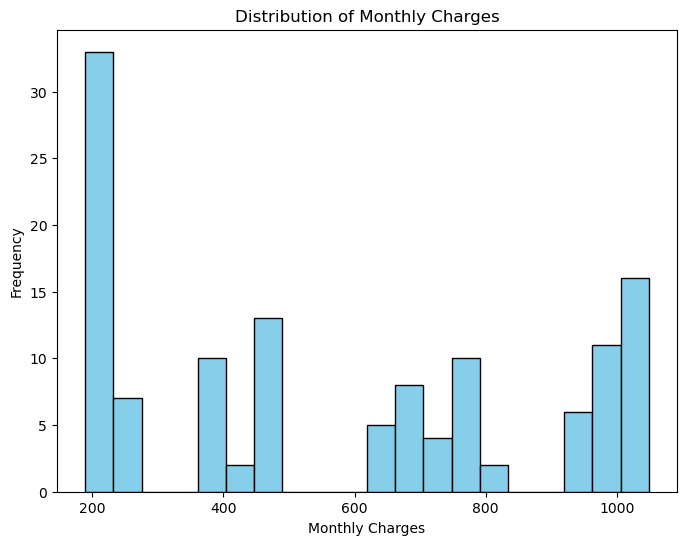

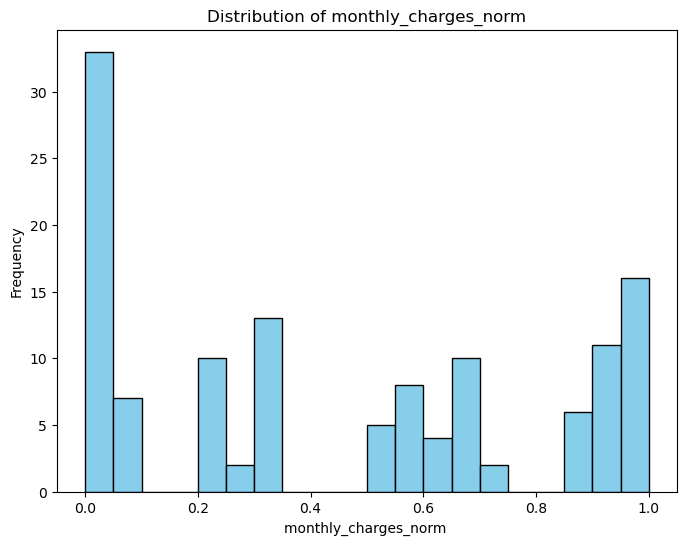

In [71]:
#4.7 Normalizing Values"""

minmax = MinMaxScaler()
df[['tenure_months_norm','monthly_charges_norm']] = minmax.fit_transform(df[['tenure_months','monthly_charges']])
df[['tenure_months','tenure_months_norm','monthly_charges','monthly_charges_norm']].head()


xmax=df['monthly_charges'].max()
xmin=df['monthly_charges'].min()
print(xmin,xmax)
xnor = (399 - xmin)/(xmax-xmin)
print("xnormalized:",xnor)

df[['tenure_months','tenure_months_norm','monthly_charges','monthly_charges_norm']].head()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(x=df[['monthly_charges']], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(x=df[['monthly_charges_norm']], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('monthly_charges_norm ')
plt.ylabel('Frequency')
plt.title('Distribution of monthly_charges_norm')
plt.show()

In [72]:
#4.8 Handling Dates and Time Features"""

# Extract year, month, and weekday from last_call_time
df['call_year'] = df['last_call_time'].dt.year
df['call_month'] = df['last_call_time'].dt.month
df['call_weekday'] = df['last_call_time'].dt.day_name()

# Calculate days since first recharge
df['days_since_first_recharge'] = (pd.to_datetime("2025-01-20") - df['first_recharge_date']).dt.days
df[['customer_id','last_call_time','first_recharge_date','days_since_first_recharge']].head()


,customer_id,last_call_time,first_recharge_date,days_since_first_recharge
0,111,2025-12-09 14:32:00,2020-04-08,1748
1,102,2025-12-09 09:15:00,2020-03-18,1769
2,101,2025-12-09 11:48:00,2020-12-11,1501
3,122,2025-12-09 22:41:00,2021-11-15,1162
4,103,2025-12-09 08:52:00,2022-05-04,992


In [73]:
4.9 Feature Engineering Example"""

# Combine plan type and region into a composite feature
df['plan_region'] = df['plan_type'] + "_" + df['region']
df[['plan_type','region','plan_region']].head()

"""# Feature Selection

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

df =df.drop(['tenure_months','total_charges','region','monthly_charges'],axis=1)


#X = df.drop('Churn', axis=1)
#y = df['Churn']
print(df['churn'])
# Encode label as numeric
df['churn_encoded'] = df['churn'].map({'Yes': 1, 'No': 0})
print(df['churn_encoded'])

# Select only numeric columns
X = df.select_dtypes(include=np.number).drop(columns=['churn_encoded'], errors='ignore')
y = df['churn_encoded']

# Fill missing values if any (important for MI computation)
X = X.fillna(0)

# Mutual Information (Feature Importance)

mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)

importance = (
    pd.DataFrame({'Feature': X.columns, 'MI_Score': mi})
    .sort_values(by='MI_Score', ascending=False)
    .reset_index(drop=True)
)

print("Mutual Information Scores:\n")
print(importance)

# Plot Mutual Information Scores
plt.figure(figsize=(8, 5))
sns.barplot(data=importance, x='MI_Score', y='Feature', palette='viridis')
plt.title("Feature Importance (Mutual Information)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()

# Correlation Analysis
corr = df.corr(numeric_only=True)

# Sort by correlation with churn
corr_sorted = corr['churn_encoded'].sort_values(ascending=False)

print("\nFeature Correlations with Churn:\n")
print(corr_sorted)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif

"""4.12 Saving and Exporting Processed Data"""

df.to_csv("telecom_processed.csv", index=False)
print("telecom_processed.csv saved successfully.")

"""### Key Takeaways

- **Feature** = Input variable for ML model  
- **Label** = Output or prediction target  
- **Encoding** makes categorical data numerical  
- **Scaling** ensures all numeric values lie on comparable scales  
- **Date handling** extracts time-based insights  
- **Feature selection** identifies which variables actually affect churn  
- **All examples** use one consistent dataset → `telecom_churn.csv`

---

# M2C6.1 Ravi's Invisible Bugs
"""

import pandas as pd
import numpy as np

# =========================
# Step 1: Base Original Dataset
# =========================
data = {
    "Customer_ID": ["001","001","001","002","002","002","003","003","003","004","004","005"],
    "Call_Timestamps": ["2025-08-01 10:15","2025-08-01 12:00","2025-08-01 22:32",
                        "2025-08-02 00:30","2025-08-03 12:30","2025-08-05 15:00",
                        "2025-08-01 09:00","2025-08-02 10:15","2025-08-04 20:30",
                        "2025-08-03 11:00","2025-08-08 18:00","2025-08-06 15:45"],
    "Data_Usage_MB": [500,1200,1500,700,635,550,2000,1800,2200,400,350,900],
    "Recharge_Amount": [199,0,0,299,199,0,399,0,199,149,0,299],
    "Plan_Type": ["Basic","Basic","Basic","Premium","Premium","Premium","Unlimited","Unlimited","Unlimited","Basic","Basic","Premium"],
    "Dropped_Calls": [2,1,3,0,2,1,1,0,2,3,2,0],
    "Complaint": ["Yes","Yes","Yes","No","Yes","No","No","No","Yes","Yes","No","No"]
}

df = pd.DataFrame(data)

# =========================
# Step 2: Inject Ravi's Invisible Bugs
# =========================

# Add signal_strength with ~18% NULLs
np.random.seed(42)
signal_strength = np.random.randint(1, 6, size=len(df)).astype(float)
null_indices = np.random.choice(df.index, size=int(0.18 * len(df)), replace=False)
signal_strength[null_indices] = np.nan
df["Signal_Strength"] = signal_strength

# Add Zone column (98% Urban, 2% Rural)
zones = ["Urban"] * (len(df)-1) + ["Rural"]
np.random.shuffle(zones)
df["Zone"] = zones

# Introduce outliers in Data_Usage_MB (>10 TB = 10,000,000 MB)
outlier_indices = np.random.choice(df.index, size=6, replace=False)
df.loc[outlier_indices, "Data_Usage_MB"] = df.loc[outlier_indices, "Data_Usage_MB"] * 1e6

# =========================
# Step 3: Validation Summary
# =========================
validation_summary = pd.DataFrame({
    "Check": [
        "Missing Signal_Strength",
        "Outliers (>10 TB)",
        "Rural Zone Representation"
    ],
    "Issue Found": [
        f"{df['Signal_Strength'].isna().mean()*100:.0f}% NULL values",
        f"{(df['Data_Usage_MB'] > 1e7).sum()} extreme outliers",
        f"{(df['Zone'] == 'Rural').mean()*100:.0f}% Rural samples"
    ]
})

# =========================
# Step 4: Display
# =========================
styled_raw = (
    df.style.hide(axis="index")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([{"selector": "th", "props": [("text-align", "center")]}])
        .set_caption("Telecom Dataset with Ravi's Invisible Bug")
)
display(styled_raw)

styled_validation = (
    validation_summary.style.hide(axis="index")
        .set_properties(**{"text-align": "center", "font-weight": "bold"})
        .set_table_styles([{"selector": "th", "props": [("text-align", "center")]}])
        .set_caption("Validation Issues Detected by Arya")
)
display(styled_validation)

SyntaxError: invalid character '→' (U+2192) (3459612442.py, line 87)